In [18]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
from scipy.stats import spearmanr

def main():
    data: DataFrame = pd.read_csv('data/Group18Data.csv')
    customPlot(data,'Thread Count')
    customPlot(data,'Elements', 16)
    customPlot(data,'Elements', 8)
    customPlot(data,'Elements', 1)
    return data

def customPlot(data: DataFrame, across: str, threads = 32):

    threadCount: str = 'Thread Count'
    elements: str = 'Elements'
    algorithm: str = 'Algorithm'
    time: str = 'Time'

    if threadCount == across:
        data = data[data[elements] == max(data[elements])]
        X = data[[algorithm,threadCount,time]]
    else:
        data = data[data[threadCount] == threads]
        X =data[[algorithm,elements,time]]
    
    customcmap = ["red", "blue", "green","grey","orange","purple"]
    
    fig, axis = plot.subplots(figsize=(8, 6))
    algorithmNames = np.unique(X[algorithm])

    for i in range(len(algorithmNames)):
        algoData = X[X[algorithm] == algorithmNames[i]].groupby(across).mean(numeric_only=True).reset_index()
        x = np.array(algoData[across])
        y = np.array(algoData[time])
        
        plot.plot(x, y,label=str(algorithmNames[i]), marker='o', color=customcmap[i])
        
        #Spearman correlation
        if across == 'Thread Count':
            coef, p = spearmanr(x, y)
            print("Spearman correlation:", algorithmNames[i], coef)
        if across == 'Elements':
            plot.title(f'Runtime vs Element count for {threads} threads')
        
    plot.legend(loc='best')
    axis.set_xlabel(across, fontsize=20)
    axis.set_ylabel(r'Time (s)', fontsize=20)
    if(across == threadCount):
        plot.savefig('graphs/' + across +'.png')
    else:
        plot.savefig('graphs/' + across + '_' + str(threads) +'.png')

Spearman correlation: Bitonic Sort -0.9878787878787878
Spearman correlation: MergeSort -0.9636363636363635
Spearman correlation: QuickSort 0.2606060606060606
Spearman correlation: Sample Sort 0.16363636363636364
Spearman correlation: TimSort -0.6969696969696969


,Algorithm,Implementation,Thread Count,Elements,Time
0,TimSort,OpenMP,1,1048576,0.163502
1,TimSort,OpenMP,2,1048576,0.097989
2,TimSort,OpenMP,3,1048576,0.076239
3,TimSort,OpenMP,4,1048576,0.070307
4,TimSort,OpenMP,5,1048576,0.064933
...,...,...,...,...,...
545,Sample Sort,OpenMP,6,2097152,0.512682
546,Sample Sort,OpenMP,7,2097152,0.481933
547,Sample Sort,OpenMP,8,2097152,0.619525
548,Sample Sort,OpenMP,16,2097152,0.599657


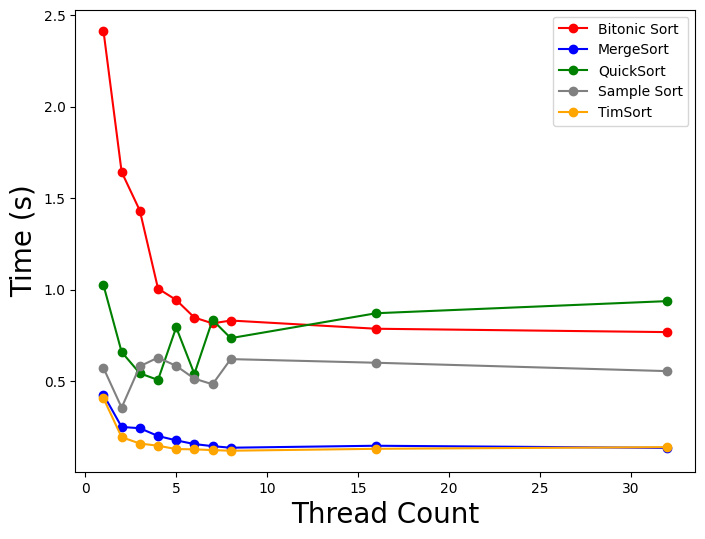

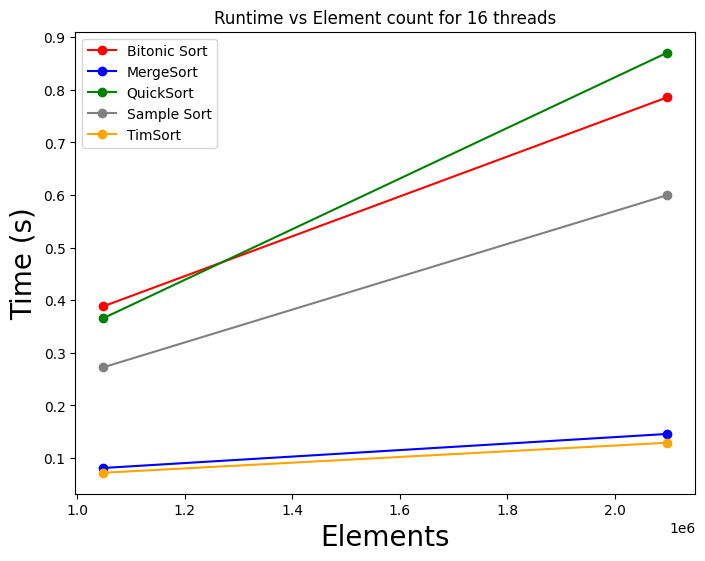

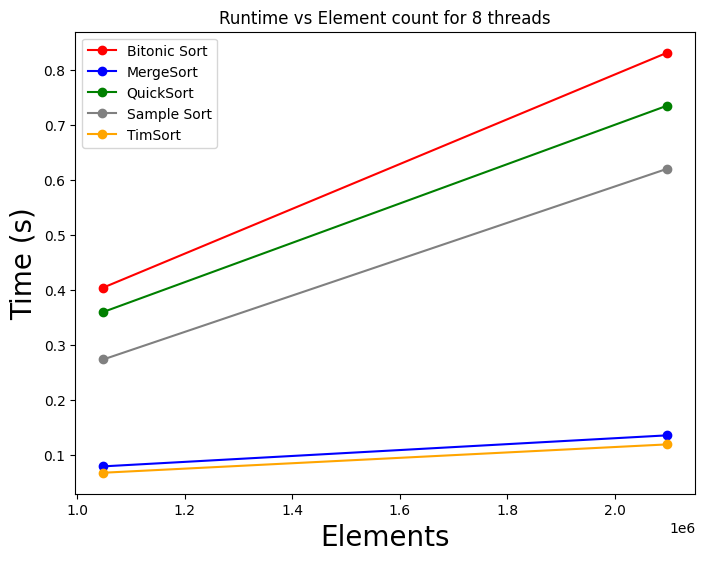

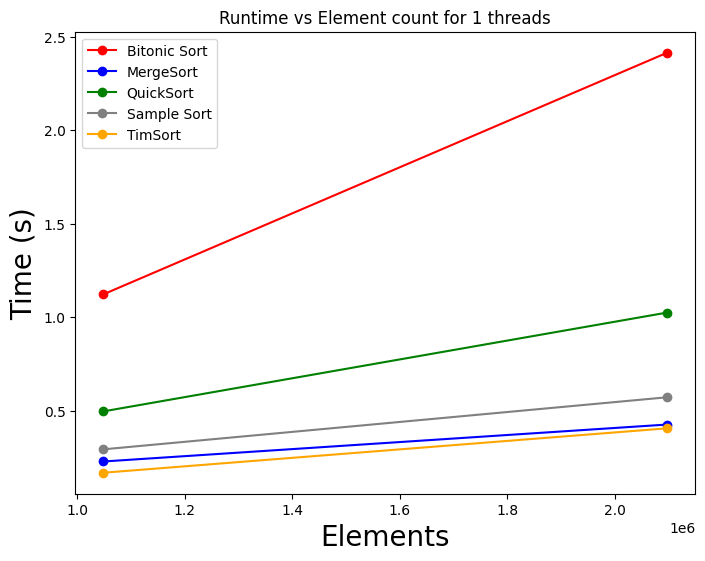

In [19]:
main()

: 

: 